In [27]:
import cirq
import numpy as np 

qr = cirq.LineQubit.range(4)

circuit = cirq.Circuit(
    cirq.Y(qr[3]),
    cirq.measure(qr, key='result')
    # cirq.measure(qr[0], key='0'),  # Measurement.
    # cirq.measure(qr[1], key='1'),  # Measurement.
    # cirq.measure(qr[2], key='2'),  # Measurement.
    # cirq.measure(qr[3], key='3'),  # Measurement.

)

print(circuit)

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=692)
# result.histogram(key='result')
# import matplotlib.pyplot as plt
# result.measurements
# cirq.plot_state_histogram(result, plt.subplot())
# plt.show()
cirq.big_endian_int_to_bits(1, bit_count=4)
result.measurements['result']

from collections import Counter

def compute_result(np_array):
    c = Counter()
    for i in np_array:
        reversed_i = map(str, i[::-1])
        bits_in_mse = ''.join(reversed_i)
        c += {bits_in_mse: 1}
    return c

compute_result(result.measurements['result'])

0: ───────M('result')───
          │
1: ───────M─────────────
          │
2: ───────M─────────────
          │
3: ───Y───M─────────────


Counter({'1000': 692})

{'1000': 692}


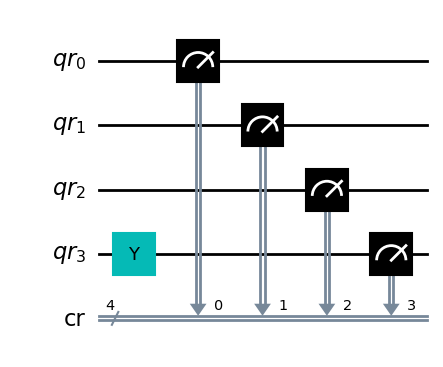

In [12]:
from qiskit.circuit.library.standard_gates import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

qr = QuantumRegister(4, name='qr')
cr = ClassicalRegister(4, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')

qc.append(YGate(), qargs=[qr[3]], cargs=[])

qc.measure(qr, cr)



from qiskit import Aer, transpile, execute
backend_0aeb997d610641108c5db249af0a7269 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_0aeb997d610641108c5db249af0a7269, shots=692).result().get_counts(qc)
RESULT = counts
print(counts)
qc.draw(output='mpl')